# ANALIZA SENTIMENT A STIRILOR FINANCIARE

ACTIVAREA PACHETELOR UTILIZATE

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re

IMPORTAREA SETULUI DE DATE

In [4]:

tweet_df = pd.read_excel('news.xls', sep=';', encoding='latin-1', header=None, names = ["categorie","comentariu"])

AFISAREA SETULUI DE DATE 

In [5]:
tweet_df


,categorie,comentariu
0,neutru,„Potrivit lui Gran compania nu intenționează ...
1,neutru,"""Technopolis intenționează să dezvolte în eta..."
2,negativ,„Compania internațională din industria electr...
3,pozitiv,odată cu noua fabrică de producție compania ș...
4,pozitiv,"""Conform strategiei actualizate a companiei p..."
...,...,...
4841,negativ,LONDON MarketWatch - Prețurile acțiunilor s-a...
4842,neutru,"""vânzările de bere Rinkuskiai au scăzut cu 65..."
4843,negativ,„Profitul operațional a scăzut la 354 milioan...
4844,negativ,„Vânzările nete ale segmentului Hârtie au scă...


VIZUALIZAREA PRIMELOR SI ULTIMELOR LINII

In [6]:
tweet_df.head
tweet_df.tail

<bound method NDFrame.tail of      categorie                                         comentariu
0       neutru   „Potrivit lui Gran compania nu intenționează ...
1       neutru   "Technopolis intenționează să dezvolte în eta...
2      negativ   „Compania internațională din industria electr...
3      pozitiv   odată cu noua fabrică de producție compania ș...
4      pozitiv   "Conform strategiei actualizate a companiei p...
...        ...                                                ...
4841   negativ   LONDON MarketWatch - Prețurile acțiunilor s-a...
4842    neutru   "vânzările de bere Rinkuskiai au scăzut cu 65...
4843   negativ   „Profitul operațional a scăzut la 354 milioan...
4844   negativ   „Vânzările nete ale segmentului Hârtie au scă...
4845   negativ   „Vânzările în Finlanda au scăzut cu 105% în i...

[4846 rows x 2 columns]>

VIZUALIZAREA DIMENSIUNII SETULUI DE DATE

In [7]:
print(tweet_df.shape)

(4846, 2)


PREZENTAREA VARIABILELOR SETULUI DE DATE

In [8]:

print(tweet_df.shape)
print("NUME COLOANE" , tweet_df.columns)

print(tweet_df.info())

(4846, 2)
NUME COLOANE Index(['categorie', 'comentariu'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
categorie     4846 non-null object
comentariu    4846 non-null object
dtypes: object(2)
memory usage: 75.8+ KB
None


PREZENTAREA DESCRIERII SETULUI DE DATE

In [9]:
tweet_df.describe()

,categorie,comentariu
count,4846,4846
unique,3,4827
top,neutru,„Compania deservește clienții din diverse ind...
freq,2879,2


VERIFICAREA EXISTENTEI VALORILOR LIPSA

In [10]:
tweet_df.isna().sum()

categorie     0
comentariu    0
dtype: int64

VIZUALIZAREA TEXTULUI PE CATEGORII

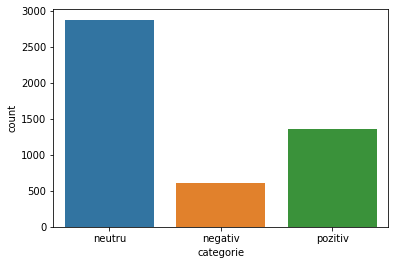

In [11]:
sns.countplot(x="categorie",data=tweet_df)

# TEXT PRE-PROCESSING

1. ELIMINAREA SEMNELOR DE PUNCTUATIE SI TRANSFORMAREA LITERELOR MARI IN LITERE MICI

In [155]:

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = text.lower()
    return text

tweet_df['comentariu'] = tweet_df['comentariu'].apply(lambda x: remove_punct(x))
tweet_df.head(10)

,categorie,comentariu
0,neutru,„potrivit lui gran compania nu intenționează să mute toată producția în rusia deși acolo crește...
1,neutru,technopolis intenționează să dezvolte în etape o suprafață de cel puțin de metri pătrați pentr...
2,negativ,„compania internațională din industria electronică elcoteq a concediat zeci de angajați din ins...
3,pozitiv,odată cu noua fabrică de producție compania șiar crește capacitatea de a satisface creșterea pr...
4,pozitiv,conform strategiei actualizate a companiei pentru anii basware vizează o creștere pe termen lu...
5,pozitiv,finanțarea creșterii aspocomp aspocomp își urmărește în mod agresiv strategia de creștere conce...
6,pozitiv,„pentru ultimul trimestru al anului vânzările nete ale componentei sau dublat la milioane eur...
7,pozitiv,„în al treilea trimestru al anului vânzările nete au crescut cu până la milioane eur iar pro...
8,pozitiv,profitul operațional a crescut la milioane eur de la milioane eur în perioada corespunzătoare...
9,pozitiv,profitul operațional a totalizat milioane eur în creștere față de milioane eur în reprezentâ...


2. TOKENIZAREA SI ELIMINAREA CUVINTELOR DE OPRIRE

In [156]:

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('romanian')
print(stopword)



['a', 'abia', 'acea', 'aceasta', 'această', 'aceea', 'aceeasi', 'acei', 'aceia', 'acel', 'acela', 'acelasi', 'acele', 'acelea', 'acest', 'acesta', 'aceste', 'acestea', 'acestei', 'acestia', 'acestui', 'aceşti', 'aceştia', 'adica', 'ai', 'aia', 'aibă', 'aici', 'al', 'ala', 'ale', 'alea', 'alt', 'alta', 'altceva', 'altcineva', 'alte', 'altfel', 'alti', 'altii', 'altul', 'am', 'anume', 'apoi', 'ar', 'are', 'as', 'asa', 'asta', 'astea', 'astfel', 'asupra', 'atare', 'atat', 'atata', 'atatea', 'atatia', 'ati', 'atit', 'atita', 'atitea', 'atitia', 'atunci', 'au', 'avea', 'avem', 'aveţi', 'avut', 'aş', 'aţi', 'ba', 'ca', 'cam', 'cand', 'care', 'careia', 'carora', 'caruia', 'cat', 'catre', 'ce', 'cea', 'ceea', 'cei', 'ceilalti', 'cel', 'cele', 'celor', 'ceva', 'chiar', 'ci', 'cind', 'cine', 'cineva', 'cit', 'cita', 'cite', 'citeva', 'citi', 'citiva', 'cu', 'cui', 'cum', 'cumva', 'cât', 'câte', 'câtva', 'câţi', 'cînd', 'cît', 'cîte', 'cîtva', 'cîţi', 'că', 'căci', 'cărei', 'căror', 'cărui', 'căt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\40751\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [157]:
from nltk.corpus import stopwords
", ".join(stopwords.words('romanian'))
STOPWORDS = set(stopwords.words('romanian'))
nltk_tokenizer = nltk.WordPunctTokenizer().tokenize
from nltk import word_tokenize

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

tweet_df["text_wo_stop"] = tweet_df["comentariu"].apply(lambda text: remove_stopwords(text))
tweet_df.head()

tweet_df["token"] = tweet_df["text_wo_stop"].apply(lambda text: word_tokenize(text))
print(tweet_df["token"])  

0       [„, potrivit, gran, compania, intenționează, mute, producția, rusia, deși, acolo, crește, compan...
1       [technopolis, intenționează, dezvolte, etape, suprafață, puțin, metri, pătrați, găzdui, companii...
2       [„, compania, internațională, industria, electronică, elcoteq, concediat, zeci, angajați, instal...
3       [odată, fabrică, producție, compania, șiar, crește, capacitatea, satisface, creșterea, preconiza...
4       [conform, strategiei, actualizate, companiei, anii, basware, vizează, creștere, termen, lung, vâ...
                                                       ...                                                 
4841    [london, marketwatch, prețurile, acțiunilor, încheiat, luni, londra, întrucât, revenirea, acțiun...
4842    [vânzările, bere, rinkuskiai, scăzut, milioane, litri, timp, vânzările, bere, kauno, alus, cresc...
4843    [„, profitul, operațional, scăzut, milioane, eur, milioane, eur, incluzând, câștig, vânzări, nav...
4844    [„, vânzările, nete,

In [158]:
#remove 
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

tweet_df.head(20)

,categorie,comentariu,text_wo_stop,token
0,neutru,„potrivit lui gran compania nu intenționează să mute toată producția în rusia deși acolo crește...,„potrivit gran compania intenționează mute producția rusia deși acolo crește compania”,"[„, potrivit, gran, compania, intenționează, mute, producția, rusia, deși, acolo, crește, compan..."
1,neutru,technopolis intenționează să dezvolte în etape o suprafață de cel puțin de metri pătrați pentr...,technopolis intenționează dezvolte etape suprafață puțin metri pătrați găzdui companii lucrează ...,"[technopolis, intenționează, dezvolte, etape, suprafață, puțin, metri, pătrați, găzdui, companii..."
2,negativ,„compania internațională din industria electronică elcoteq a concediat zeci de angajați din ins...,„compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,"[„, compania, internațională, industria, electronică, elcoteq, concediat, zeci, angajați, instal..."
3,pozitiv,odată cu noua fabrică de producție compania șiar crește capacitatea de a satisface creșterea pr...,odată fabrică producție compania șiar crește capacitatea satisface creșterea preconizată cererii...,"[odată, fabrică, producție, compania, șiar, crește, capacitatea, satisface, creșterea, preconiza..."
4,pozitiv,conform strategiei actualizate a companiei pentru anii basware vizează o creștere pe termen lu...,conform strategiei actualizate companiei anii basware vizează creștere termen lung vânzărilor ne...,"[conform, strategiei, actualizate, companiei, anii, basware, vizează, creștere, termen, lung, vâ..."
5,pozitiv,finanțarea creșterii aspocomp aspocomp își urmărește în mod agresiv strategia de creștere conce...,finanțarea creșterii aspocomp aspocomp își urmărește agresiv strategia creștere concentrânduse p...,"[finanțarea, creșterii, aspocomp, aspocomp, își, urmărește, agresiv, strategia, creștere, concen..."
6,pozitiv,„pentru ultimul trimestru al anului vânzările nete ale componentei sau dublat la milioane eur...,„pentru ultimul trimestru anului vânzările nete componentei dublat milioane eur milioane eur ace...,"[„, pentru, ultimul, trimestru, anului, vânzările, nete, componentei, dublat, milioane, eur, mil..."
7,pozitiv,„în al treilea trimestru al anului vânzările nete au crescut cu până la milioane eur iar pro...,„în trimestru anului vânzările nete crescut milioane eur profitul operațional milioane eur”,"[„, în, trimestru, anului, vânzările, nete, crescut, milioane, eur, profitul, operațional, milio..."
8,pozitiv,profitul operațional a crescut la milioane eur de la milioane eur în perioada corespunzătoare...,profitul operațional crescut milioane eur milioane eur perioada corespunzătoare reprezentând vân...,"[profitul, operațional, crescut, milioane, eur, milioane, eur, perioada, corespunzătoare, reprez..."
9,pozitiv,profitul operațional a totalizat milioane eur în creștere față de milioane eur în reprezentâ...,profitul operațional totalizat milioane eur creștere față milioane eur reprezentând vânzările nete,"[profitul, operațional, totalizat, milioane, eur, creștere, față, milioane, eur, reprezentând, v..."


3. OPERATIUNEA DE STEMMING


In [160]:

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])
tweet_df["text_stemmed"] = tweet_df["token"].apply(lambda text: stem_words(text))
tweet_df.head()



,categorie,comentariu,text_wo_stop,token,text_stemmed
0,neutru,„potrivit lui gran compania nu intenționează să mute toată producția în rusia deși acolo crește...,„potrivit gran compania intenționează mute producția rusia deși acolo crește compania”,"[„, potrivit, gran, compania, intenționează, mute, producția, rusia, deși, acolo, crește, compan...",„ potrivit gran compania intenționează mute producția rusia deși acolo creșt compania ”
1,neutru,technopolis intenționează să dezvolte în etape o suprafață de cel puțin de metri pătrați pentr...,technopolis intenționează dezvolte etape suprafață puțin metri pătrați găzdui companii lucrează ...,"[technopolis, intenționează, dezvolte, etape, suprafață, puțin, metri, pătrați, găzdui, companii...",technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...
2,negativ,„compania internațională din industria electronică elcoteq a concediat zeci de angajați din ins...,„compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,"[„, compania, internațională, industria, electronică, elcoteq, concediat, zeci, angajați, instal...",„ compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn
3,pozitiv,odată cu noua fabrică de producție compania șiar crește capacitatea de a satisface creșterea pr...,odată fabrică producție compania șiar crește capacitatea satisface creșterea preconizată cererii...,"[odată, fabrică, producție, compania, șiar, crește, capacitatea, satisface, creșterea, preconiza...",odată fabrică producți compania șiar creșt capacitatea satisfac creșterea preconizată cererii și...
4,pozitiv,conform strategiei actualizate a companiei pentru anii basware vizează o creștere pe termen lu...,conform strategiei actualizate companiei anii basware vizează creștere termen lung vânzărilor ne...,"[conform, strategiei, actualizate, companiei, anii, basware, vizează, creștere, termen, lung, vâ...",conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...


4. ELIMINAREA CELOR MAI FRECVENTE CUVINTE

In [161]:

from collections import Counter
cnt = Counter()
for text in tweet_df["text_stemmed"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('și', 2627),
 ('„', 1711),
 ('”', 1492),
 ('milioan', 1353),
 ('eur', 1324),
 ('compania', 488),
 ('anului', 397),
 ('declarat', 347),
 ('euro', 329),
 ('crescut', 301),
 ('profitul', 291),
 ('vânzările', 290),
 ('finlandez', 290),
 ('finlanda', 282),
 ('aproximativ', 272),
 ('nete', 259),
 ('mln', 254),
 ('oyj', 240),
 ('companiei', 238),
 ('trimestru', 228)]

In [162]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

tweet_df["text__stopfreq"] = tweet_df["text_stemmed"].apply(lambda text: remove_freqwords(text))
tweet_df.head()

,categorie,comentariu,text_wo_stop,token,text_stemmed,text__stopfreq
0,neutru,„potrivit lui gran compania nu intenționează să mute toată producția în rusia deși acolo crește...,„potrivit gran compania intenționează mute producția rusia deși acolo crește compania”,"[„, potrivit, gran, compania, intenționează, mute, producția, rusia, deși, acolo, crește, compan...",„ potrivit gran compania intenționează mute producția rusia deși acolo creșt compania ”,potrivit gran intenționează mute producția rusia deși acolo creșt
1,neutru,technopolis intenționează să dezvolte în etape o suprafață de cel puțin de metri pătrați pentr...,technopolis intenționează dezvolte etape suprafață puțin metri pătrați găzdui companii lucrează ...,"[technopolis, intenționează, dezvolte, etape, suprafață, puțin, metri, pătrați, găzdui, companii...",technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...,technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...
2,negativ,„compania internațională din industria electronică elcoteq a concediat zeci de angajați din ins...,„compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,"[„, compania, internațională, industria, electronică, elcoteq, concediat, zeci, angajați, instal...",„ compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,internațională industria electronică elcoteq concediat zeci angajați instalația tallinn
3,pozitiv,odată cu noua fabrică de producție compania șiar crește capacitatea de a satisface creșterea pr...,odată fabrică producție compania șiar crește capacitatea satisface creșterea preconizată cererii...,"[odată, fabrică, producție, compania, șiar, crește, capacitatea, satisface, creșterea, preconiza...",odată fabrică producți compania șiar creșt capacitatea satisfac creșterea preconizată cererii și...,odată fabrică producți șiar creșt capacitatea satisfac creșterea preconizată cererii îmbunătăți ...
4,pozitiv,conform strategiei actualizate a companiei pentru anii basware vizează o creștere pe termen lu...,conform strategiei actualizate companiei anii basware vizează creștere termen lung vânzărilor ne...,"[conform, strategiei, actualizate, companiei, anii, basware, vizează, creștere, termen, lung, vâ...",conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...,conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...


OPERATIUNEA DE LEMNATIZARE

In [163]:

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

tweet_df["text_lemmatized"] = tweet_df["text__stopfreq"].apply(lambda text: lemmatize_words(text))
tweet_df.head()


,categorie,comentariu,text_wo_stop,token,text_stemmed,text__stopfreq,text_lemmatized
0,neutru,„potrivit lui gran compania nu intenționează să mute toată producția în rusia deși acolo crește...,„potrivit gran compania intenționează mute producția rusia deși acolo crește compania”,"[„, potrivit, gran, compania, intenționează, mute, producția, rusia, deși, acolo, crește, compan...",„ potrivit gran compania intenționează mute producția rusia deși acolo creșt compania ”,potrivit gran intenționează mute producția rusia deși acolo creșt,potrivit gran intenționează mute producția rusia deși acolo creșt
1,neutru,technopolis intenționează să dezvolte în etape o suprafață de cel puțin de metri pătrați pentr...,technopolis intenționează dezvolte etape suprafață puțin metri pătrați găzdui companii lucrează ...,"[technopolis, intenționează, dezvolte, etape, suprafață, puțin, metri, pătrați, găzdui, companii...",technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...,technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...,technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...
2,negativ,„compania internațională din industria electronică elcoteq a concediat zeci de angajați din ins...,„compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,"[„, compania, internațională, industria, electronică, elcoteq, concediat, zeci, angajați, instal...",„ compania internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,internațională industria electronică elcoteq concediat zeci angajați instalația tallinn
3,pozitiv,odată cu noua fabrică de producție compania șiar crește capacitatea de a satisface creșterea pr...,odată fabrică producție compania șiar crește capacitatea satisface creșterea preconizată cererii...,"[odată, fabrică, producție, compania, șiar, crește, capacitatea, satisface, creșterea, preconiza...",odată fabrică producți compania șiar creșt capacitatea satisfac creșterea preconizată cererii și...,odată fabrică producți șiar creșt capacitatea satisfac creșterea preconizată cererii îmbunătăți ...,odată fabrică producți șiar creșt capacitatea satisfac creșterea preconizată cererii îmbunătăți ...
4,pozitiv,conform strategiei actualizate a companiei pentru anii basware vizează o creștere pe termen lu...,conform strategiei actualizate companiei anii basware vizează creștere termen lung vânzărilor ne...,"[conform, strategiei, actualizate, companiei, anii, basware, vizează, creștere, termen, lung, vâ...",conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...,conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...,conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...


6. ELIMINAREA COLOANELOR CARE NU VOR FI UTILIZATE

In [164]:
#drop the columns
tweet_df=tweet_df.drop(["text_stemmed","text__stopfreq"],axis=1)

7. CODIFICAREA VARIABILEI CATEGORIALE

In [165]:
#label encoding
from sklearn.preprocessing import LabelEncoder
tweet_df['categorie_codificata'] = LabelEncoder().fit_transform(tweet_df['categorie'])
tweet_df[["categorie", "categorie_codificata"]] 

,categorie,categorie_codificata
0,neutru,1
1,neutru,1
2,negativ,0
3,pozitiv,2
4,pozitiv,2
...,...,...
4841,negativ,0
4842,neutru,1
4843,negativ,0
4844,negativ,0


In [166]:
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [167]:
tweet_df=tweet_df.drop(["categorie","text_wo_stop","comentariu"],axis=1)

PREVIZUALIZAREA TEXTULUI CURATAT SI PREPROCESAT

In [168]:
tweet_df.head(10)

,token,text_lemmatized,categorie_codificata
0,"[„, potrivit, gran, compania, intenționează, mute, producția, rusia, deși, acolo, crește, compan...",potrivit gran intenționează mute producția rusia deși acolo creșt,1
1,"[technopolis, intenționează, dezvolte, etape, suprafață, puțin, metri, pătrați, găzdui, companii...",technopoli intenționează dezvolt etap suprafață puțin metri pătrați găzdui companii lucrează teh...,1
2,"[„, compania, internațională, industria, electronică, elcoteq, concediat, zeci, angajați, instal...",internațională industria electronică elcoteq concediat zeci angajați instalația tallinn,0
3,"[odată, fabrică, producție, compania, șiar, crește, capacitatea, satisface, creșterea, preconiza...",odată fabrică producți șiar creșt capacitatea satisfac creșterea preconizată cererii îmbunătăți ...,2
4,"[conform, strategiei, actualizate, companiei, anii, basware, vizează, creștere, termen, lung, vâ...",conform strategiei actualiz companiei anii baswar vizează creșter termen lung vânzărilor nete in...,2
5,"[finanțarea, creșterii, aspocomp, aspocomp, își, urmărește, agresiv, strategia, creștere, concen...",finanțarea creșterii aspocomp aspocomp își urmăreșt agresiv strategia creșter concentrândus pcbu...,2
6,"[„, pentru, ultimul, trimestru, anului, vânzările, nete, componentei, dublat, milioane, eur, mil...",pentru ultimul trimestru vânzările nete componentei dublat aceeași perioadă preced timp mutat pr...,2
7,"[„, în, trimestru, anului, vânzările, nete, crescut, milioane, eur, profitul, operațional, milio...",în trimestru vânzările nete profitul operațion,2
8,"[profitul, operațional, crescut, milioane, eur, milioane, eur, perioada, corespunzătoare, reprez...",profitul operațion perioada corespunzătoar reprezentând vânzările nete,2
9,"[profitul, operațional, totalizat, milioane, eur, creștere, față, milioane, eur, reprezentând, v...",profitul operațion totalizat creșter față reprezentând vânzările nete,2


ALGORITMI DE CLASIFICARE

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

IMPARTIREA BAZEI IN SET DE DATE DE ANTRENAMENT SI SET DE DATE DE TESTARE

In [170]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

x_train,x_test,y_train,y_test = train_test_split(tweet_df.text_lemmatized,tweet_df.categorie_codificata,test_size = 0.3 , random_state = 0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3392,), (1454,), (3392,), (1454,))

1. LINEAR SUPPORT VECTOR MACHINE

In [171]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("MODEL - LINEAR SVC")
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

MODEL - LINEAR SVC
accuracy score: 74.14%
[[ 86  62  34]
 [ 14 776  89]
 [ 14 163 216]]
              precision    recall  f1-score   support

           0       0.75      0.47      0.58       182
           1       0.78      0.88      0.83       879
           2       0.64      0.55      0.59       393

    accuracy                           0.74      1454
   macro avg       0.72      0.63      0.67      1454
weighted avg       0.74      0.74      0.73      1454



2. LOGISTIC REGRESSION

In [172]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("MODEL - LOGISTIC REGRESSION")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

MODEL - LOGISTIC REGRESSION
accuracy: 72.49%
[[ 60  98  24]
 [  5 852  22]
 [  6 245 142]]
              precision    recall  f1-score   support

           0       0.85      0.33      0.47       182
           1       0.71      0.97      0.82       879
           2       0.76      0.36      0.49       393

    accuracy                           0.72      1454
   macro avg       0.77      0.55      0.59      1454
weighted avg       0.74      0.72      0.69      1454



C:\Users\40751\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\40751\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


3. MULTINOMIAL NAIVE BAYES

In [173]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("MULTINOMIAL NAIVE BAYES")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

MULTINOMIAL NAIVE BAYES
accuracy: 68.98%
[[ 10 115  57]
 [  0 852  27]
 [  1 251 141]]
              precision    recall  f1-score   support

           0       0.91      0.05      0.10       182
           1       0.70      0.97      0.81       879
           2       0.63      0.36      0.46       393

    accuracy                           0.69      1454
   macro avg       0.75      0.46      0.46      1454
weighted avg       0.71      0.69      0.63      1454



4. BERNOULLI NAIVE BAYES 

In [174]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("BERNOULLIS NAIVE BAYES")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

BERNOULLIS NAIVE BAYES
accuracy: 68.23%
[[  6 112  64]
 [  0 839  40]
 [  0 246 147]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       182
           1       0.70      0.95      0.81       879
           2       0.59      0.37      0.46       393

    accuracy                           0.68      1454
   macro avg       0.76      0.45      0.44      1454
weighted avg       0.71      0.68      0.62      1454



5. GRADIENT BOOSTING CLASSIFICATION MODEL

In [175]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("GRADIENT BOOST")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

GRADIENT BOOST
accuracy: 60.45%
[[  0 182   0]
 [  0 879   0]
 [  0 393   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       182
           1       0.60      1.00      0.75       879
           2       0.00      0.00      0.00       393

    accuracy                           0.60      1454
   macro avg       0.20      0.33      0.25      1454
weighted avg       0.37      0.60      0.46      1454



C:\Users\40751\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


6. XGBOOST CLASSIFICATION MODEL

In [176]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("XGBOOST")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

XGBOOST
accuracy: 70.63%
[[ 76  93  13]
 [  7 842  30]
 [  4 280 109]]
              precision    recall  f1-score   support

           0       0.87      0.42      0.57       182
           1       0.69      0.96      0.80       879
           2       0.72      0.28      0.40       393

    accuracy                           0.71      1454
   macro avg       0.76      0.55      0.59      1454
weighted avg       0.72      0.71      0.67      1454



7. DECISION TREE CLASSIFICATION MODEL

In [177]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("DECISION TREE")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

DECISION TREE
accuracy: 70.84%
[[ 83  89  10]
 [ 11 852  16]
 [  6 292  95]]
              precision    recall  f1-score   support

           0       0.83      0.46      0.59       182
           1       0.69      0.97      0.81       879
           2       0.79      0.24      0.37       393

    accuracy                           0.71      1454
   macro avg       0.77      0.56      0.59      1454
weighted avg       0.73      0.71      0.66      1454



8. K- NEAREST NEIGHBOUR CLASSIFIER MODEL

In [178]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])
model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("K NEAREST NEIGHBOR")
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

K NEAREST NEIGHBOR
accuracy: 70.15%
[[ 60  66  56]
 [ 11 753 115]
 [ 12 174 207]]
              precision    recall  f1-score   support

           0       0.72      0.33      0.45       182
           1       0.76      0.86      0.80       879
           2       0.55      0.53      0.54       393

    accuracy                           0.70      1454
   macro avg       0.68      0.57      0.60      1454
weighted avg       0.70      0.70      0.69      1454

